Optimizing Eggholder function using PSO...


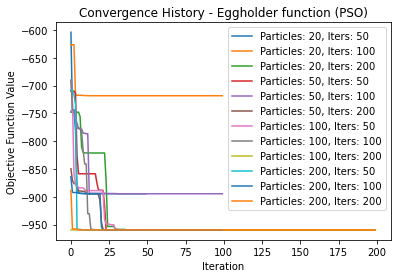


Best fitness for Eggholder function: -928.6742611833214

Optimizing Holder Table function using PSO...


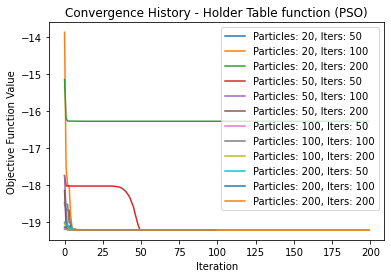


Best fitness for Holder Table function: -18.960859171927748


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function - Eggholder function
def calculate_eggholder_fitness(x, y):
    return -(y + 47) * np.sin(np.sqrt(np.abs(y + x/2 + 47))) - x * np.sin(np.sqrt(np.abs(x - (y + 47))))

# Define the objective function - Holder Table function
def calculate_holder_table_fitness(x, y):
    term1 = np.sin(x) * np.cos(y)
    term2 = np.exp(np.abs(1 - np.sqrt(x*x + y*y) / np.pi))
    return -np.abs(term1 * term2)

# Particle Swarm Optimization algorithm
def particle_swarm_optimization(objective_func, bounds, num_particles, max_iters, c1, c2, w):
    # Initialize particle positions and velocities
    particle_positions = np.random.uniform(bounds[0], bounds[1], (num_particles, len(bounds)))
    particle_velocities = np.zeros_like(particle_positions)

    # Initialize personal best positions and fitness values
    personal_best_positions = particle_positions.copy()
    personal_best_fitness = np.array([objective_func(*pos) for pos in personal_best_positions])

    # Initialize global best position and fitness value
    global_best_index = np.argmin(personal_best_fitness)
    global_best_position = personal_best_positions[global_best_index]
    global_best_fitness = personal_best_fitness[global_best_index]

    # Initialize convergence history
    best_fitness_history = []

    # Iterate through iterations
    for _ in range(max_iters):
        # Update velocities and positions
        particle_velocities = w * particle_velocities + c1 * np.random.rand(num_particles, len(bounds)) * (personal_best_positions - particle_positions) + \
                              c2 * np.random.rand(num_particles, len(bounds)) * (np.tile(global_best_position, (num_particles, 1)) - particle_positions)
        particle_positions += particle_velocities

        # Clip positions to the bounds
        particle_positions = np.clip(particle_positions, bounds[0], bounds[1])

        # Evaluate fitness values
        fitness_values = np.array([objective_func(*pos) for pos in particle_positions])

        # Update personal best positions and fitness values
        update_indices = fitness_values < personal_best_fitness
        personal_best_positions[update_indices] = particle_positions[update_indices]
        personal_best_fitness[update_indices] = fitness_values[update_indices]

        # Update global best position and fitness value
        global_best_index = np.argmin(personal_best_fitness)
        global_best_position = personal_best_positions[global_best_index]
        global_best_fitness = personal_best_fitness[global_best_index]

        # Update convergence history
        best_fitness_history.append(global_best_fitness)

    return global_best_position, global_best_fitness, best_fitness_history

# Set the parameters
bounds_eggholder = [-512, 512]
bounds_holder_table = [-10, 10]
num_particles_list = [20, 50, 100, 200]
max_iters_list = [50, 100, 200]
c1 = 2
c2 = 2
w = 0.5

# Run PSO optimization for Eggholder function
print("Optimizing Eggholder function using PSO...")
total_fitness_eggholder = 0
total_iterations_eggholder = 0

for num_particles in num_particles_list:
    for max_iters in max_iters_list:
        best_position, best_fitness, convergence_history = particle_swarm_optimization(calculate_eggholder_fitness, bounds_eggholder,
                                                                                      num_particles, max_iters, c1, c2, w)
        plt.plot(convergence_history, label=f"Particles: {num_particles}, Iters: {max_iters}")
        total_fitness_eggholder += best_fitness
        total_iterations_eggholder += 1
        
plt.title("Convergence History - Eggholder function (PSO)")
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.legend()
plt.show()
print("\nBest fitness for Eggholder function:", total_fitness_eggholder / total_iterations_eggholder)

# Run PSO optimization for Holder Table function
print("\nOptimizing Holder Table function using PSO...")
total_fitness_holder_table = 0
total_iterations_holder_table = 0

for num_particles in num_particles_list:
    for max_iters in max_iters_list:
        best_position, best_fitness, convergence_history = particle_swarm_optimization(calculate_holder_table_fitness, bounds_holder_table,
                                                                                      num_particles, max_iters, c1, c2, w)
        plt.plot(convergence_history, label=f"Particles: {num_particles}, Iters: {max_iters}")
        total_fitness_holder_table += best_fitness
        total_iterations_holder_table += 1
        
plt.title("Convergence History - Holder Table function (PSO)")
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.legend()
plt.show()
print("\nBest fitness for Holder Table function:", total_fitness_holder_table / total_iterations_holder_table)
